In [1]:
#Data reading and visaulizing tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Logestic regression tools
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector

#evaluation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from sklearn import set_config
set_config(display='diagram')

In [ ]:
drug =pd.read_csv('/content/drive/MyDrive/Logestic_Regression/drug200.csv')

In [ ]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
drug['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
drug['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
drug['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
drug['Sex'].unique()

array(['F', 'M'], dtype=object)

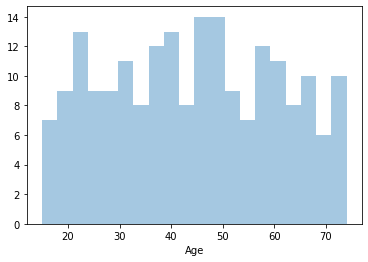

In [ ]:
sns.distplot(drug['Age'], bins=20, kde=False)

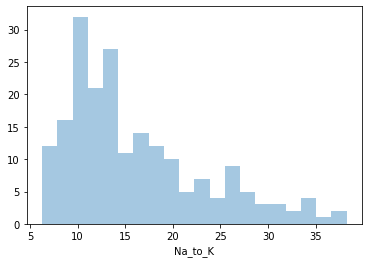

In [ ]:
sns.distplot(drug['Na_to_K'], bins=20, kde=False)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


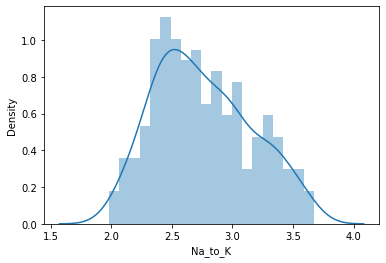

In [ ]:
sns.distplot(np.log1p(drug['Na_to_K']), bins=20, kde=True)


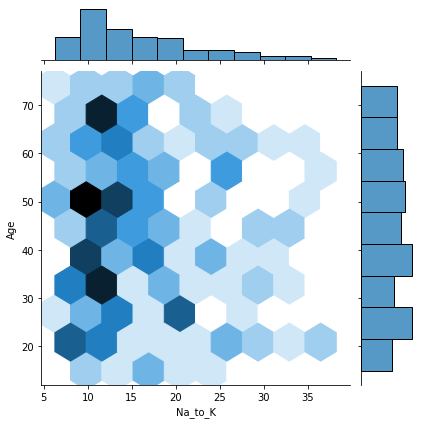

In [ ]:
sns.jointplot(data=drug,x='Na_to_K',y='Age', kind='hex')

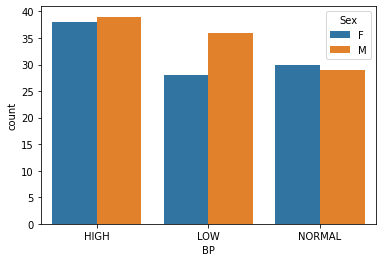

In [ ]:
sns.countplot(data=drug,x='BP',hue='Sex',)

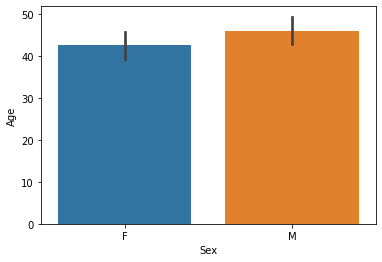

In [ ]:
sns.barplot(data=drug,x='Sex',y='Age')

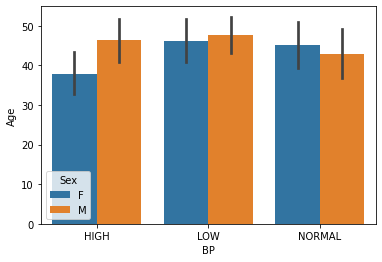

In [ ]:
sns.barplot(data=drug,x='BP',y='Age', hue='Sex')

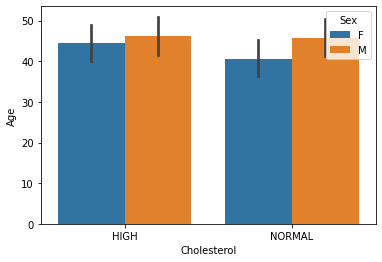

In [ ]:
sns.barplot(data=drug,x='Cholesterol',y='Age', hue='Sex')

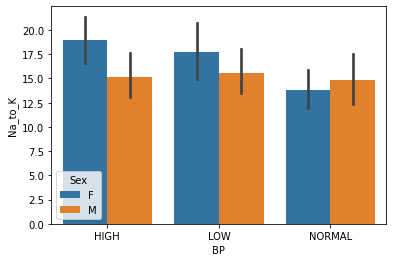

In [ ]:
sns.barplot(data=drug,x='BP',y='Na_to_K', hue='Sex')

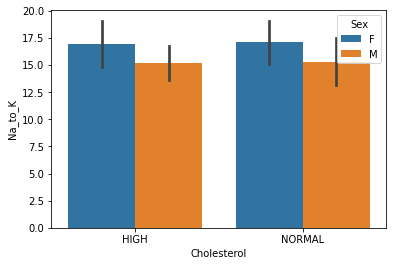

In [ ]:
sns.barplot(data=drug,x='Cholesterol',y='Na_to_K', hue='Sex')

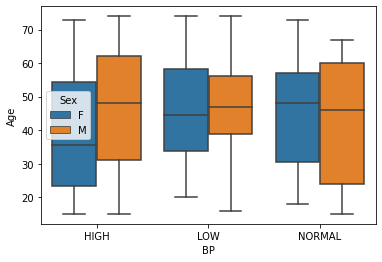

In [ ]:
sns.boxplot(data=drug,x ='BP',y='Age',hue='Sex')

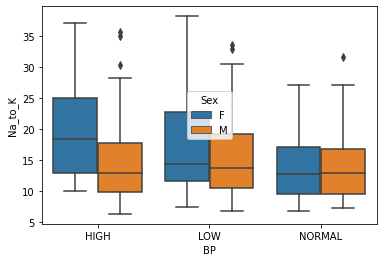

In [ ]:
sns.boxplot(data=drug,x ='BP',y='Na_to_K',hue='Sex')

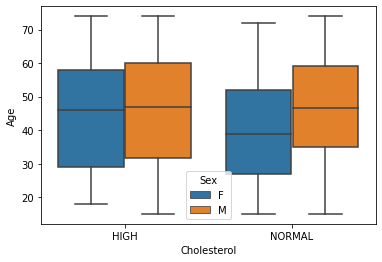

In [ ]:
sns.boxplot(data=drug,x ='Cholesterol',y='Age',hue='Sex')

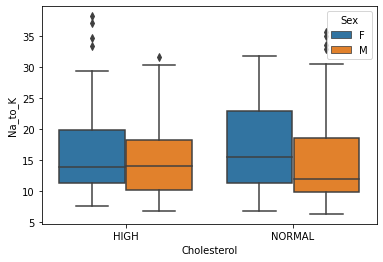

In [ ]:
sns.boxplot(data=drug,x ='Cholesterol',y='Na_to_K',hue='Sex')

In [ ]:
#check missing values
drug.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Prepare the data

In [ ]:
X=drug.drop('Drug',axis=1)
y=drug['Drug']

###  split the data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Create a transformer

In [ ]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['Sex']),
                                     (OrdinalEncoder(categories = [['LOW', 'NORMAL', 'HIGH']]), ['BP']),
                                      (OrdinalEncoder(categories=[[ 'NORMAL','HIGH']]),['Cholesterol']),
                                      remainder=StandardScaler())
extractor = SelectFromModel(LogisticRegression(penalty='l2', solver ='lbfgs' ,random_state = 42, multi_class='multinomial'))

### Create the pipe


In [ ]:
logreg_pipe=Pipeline(
    steps=[('transfrom', transformer),
           ('selector',extractor),
           ('model', LogisticRegression(random_state=42,max_iter=1000,multi_class='multinomial'))]
)
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('transfrom',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex']),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['LOW',
                                                                              'NORMAL',
                                                                              'HIGH']]),
                                                  ['BP']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['NORMAL',
                                                                              'HIGH']]),
                                                  ['Cholesterol'])])),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(multi_class='multinomial',
                                                              random_state=42))),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    random_state=42))])

In [ ]:
logreg_pipe.named_steps['model'].coef_

array([[-0.44995572,  3.81134166],
       [ 2.14704617, -1.09469839],
       [ 1.96140558, -0.49985694],
       [-2.52641421, -1.0467832 ],
       [-1.13208183, -1.17000313]])

In [ ]:
logreg_pipe.named_steps['model'].intercept_

array([ 2.89922381, -3.39894607, -2.88018538,  1.41424161,  1.96566602])

In [ ]:
logreg_pipe.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [ ]:
logreg_pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('transfrom',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex']),
                                                 ('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['LOW',
                                                                              'NORMAL',
                                                                              'HIGH']]),
                                                  ['BP']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['NORMAL',
                                                                              'HIGH']]),
                      

In [ ]:
logreg_pipe.named_steps['selector'].get_feature_names_out()

array(['x1', 'x4'], dtype=object)

In [ ]:
logreg_pipe.feature_names_in_

array(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype=object)

In [ ]:
logreg_pipe.named_steps['transfrom']

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'), ['Sex']),
                                ('ordinalencoder-1',
                                 OrdinalEncoder(categories=[['LOW', 'NORMAL',
                                                             'HIGH']]),
                                 ['BP']),
                                ('ordinalencoder-2',
                                 OrdinalEncoder(categories=[['NORMAL',
                                                             'HIGH']]),
                                 ['Cholesterol'])])

### Prediction

In [ ]:
y_pred=logreg_pipe.predict(X_test)

In [ ]:
confusion=confusion_matrix(y_test,y_pred)

In [ ]:
print(confusion)
print(classification_report(y_test,y_pred))

[[26  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  0  0  6]
 [ 0  0  0  0 18]]
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       0.70      1.00      0.82         7
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.75      1.00      0.86        18

    accuracy                           0.85        60
   macro avg       0.49      0.60      0.54        60
weighted avg       0.74      0.85      0.79        60



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


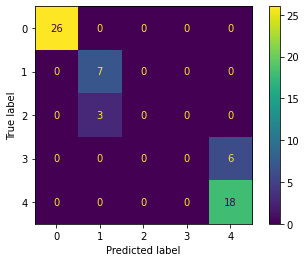

In [ ]:
disp=ConfusionMatrixDisplay(confusion)
disp.plot()